In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
datahr=pd.read_csv(r"C:\Users\Abraham\Desktop\Solo\Bootcamp\portfolio\Human resources Analysis\CleanedHRdata.csv")

In [122]:
datahr.drop("Unnamed: 0",axis=1,inplace=True)

In [123]:
datahr.set_index("EmpID",inplace=True)

## Data analysys 

In [124]:
datahr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1473 entries, RM297 to RM1210
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1473 non-null   int64  
 1   AgeGroup                  1473 non-null   object 
 2   Attrition                 1473 non-null   object 
 3   BusinessTravel            1473 non-null   object 
 4   DailyRate                 1473 non-null   int64  
 5   Department                1473 non-null   object 
 6   DistanceFromHome          1473 non-null   int64  
 7   Education                 1473 non-null   int64  
 8   EducationField            1473 non-null   object 
 9   EnvironmentSatisfaction   1473 non-null   int64  
 10  Gender                    1473 non-null   object 
 11  HourlyRate                1473 non-null   int64  
 12  JobInvolvement            1473 non-null   int64  
 13  JobLevel                  1473 non-null   int64  
 14  JobRole

In [125]:
datahr.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'left_company'],
      dtype='object')

In [126]:
datahr.iloc[:, 10:21] 

,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked
EmpID,,,,,,,,,,,
RM297,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1
RM302,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1
RM458,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1
RM728,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1
RM829,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1
...,...,...,...,...,...,...,...,...,...,...,...
RM412,Female,41,3,5,Manager,1,Married,19566,15k+,3854,5
RM428,Female,80,2,3,Sales Executive,1,Married,10266,10k-15k,2845,4
RM537,Male,84,3,2,Sales Executive,1,Single,5405,5k-10k,11924,8


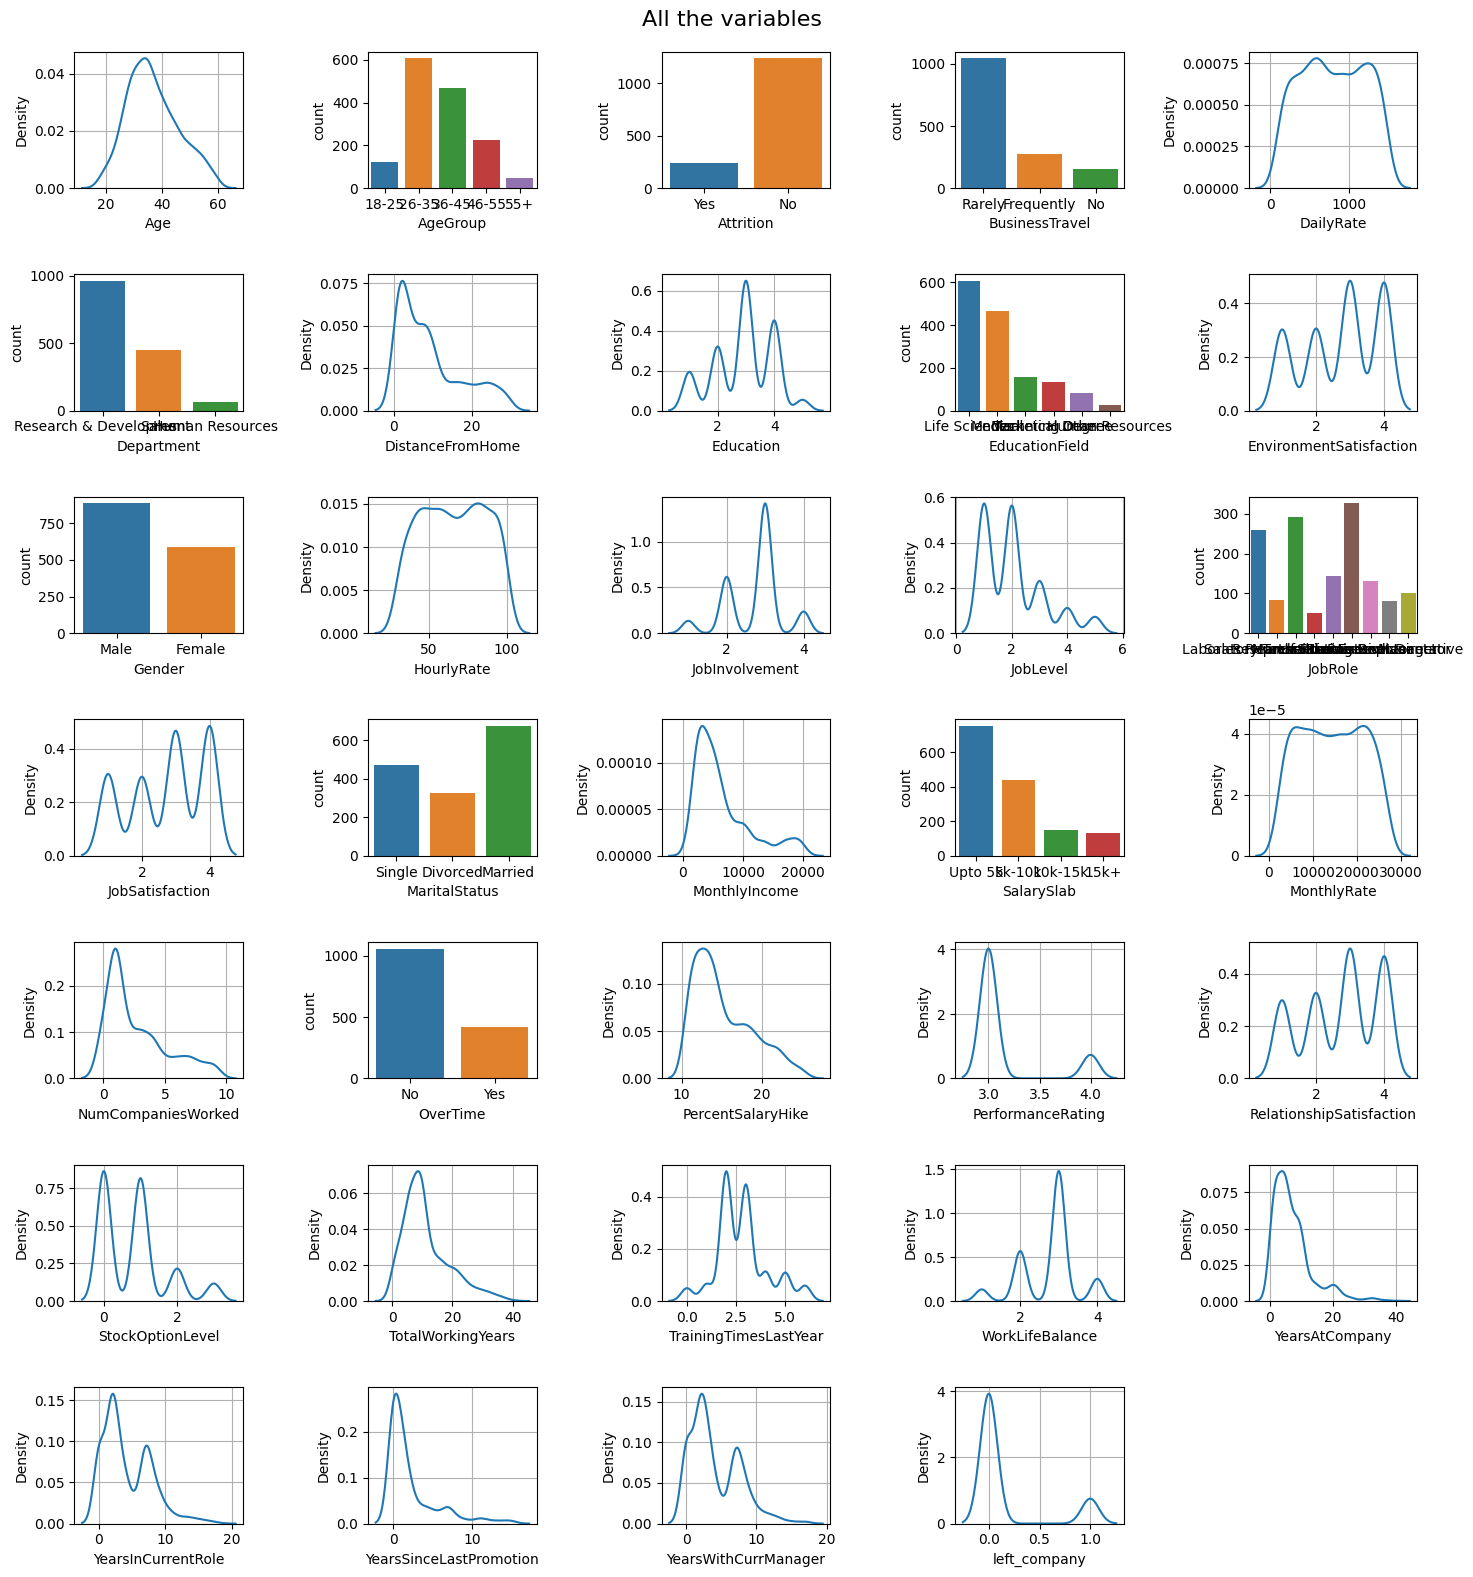

In [127]:

r = 8  
c = 5  
it = 1  

plt.figure(figsize=(15, 18))

for i in datahr.columns:
    plt.suptitle("All the variables", fontsize=16)
    plt.subplot(r, c, it)
    
    if datahr[i].dtype == 'object':
        sns.countplot(x=datahr[i])
    else:
        sns.kdeplot(datahr[i])
        plt.grid()

    it += 1

# Increase space between subplots
plt.tight_layout(pad=2.0)
plt.show()

## Object categories

In [128]:
object_cols=datahr.select_dtypes(include="object")
object_cols.head(3)

,AgeGroup,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,SalarySlab,OverTime
EmpID,,,,,,,,,,
RM297,18-25,Yes,Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Upto 5k,No
RM302,18-25,No,Rarely,Sales,Medical,Female,Sales Representative,Single,Upto 5k,No
RM458,18-25,Yes,Frequently,Sales,Marketing,Male,Sales Representative,Single,Upto 5k,Yes


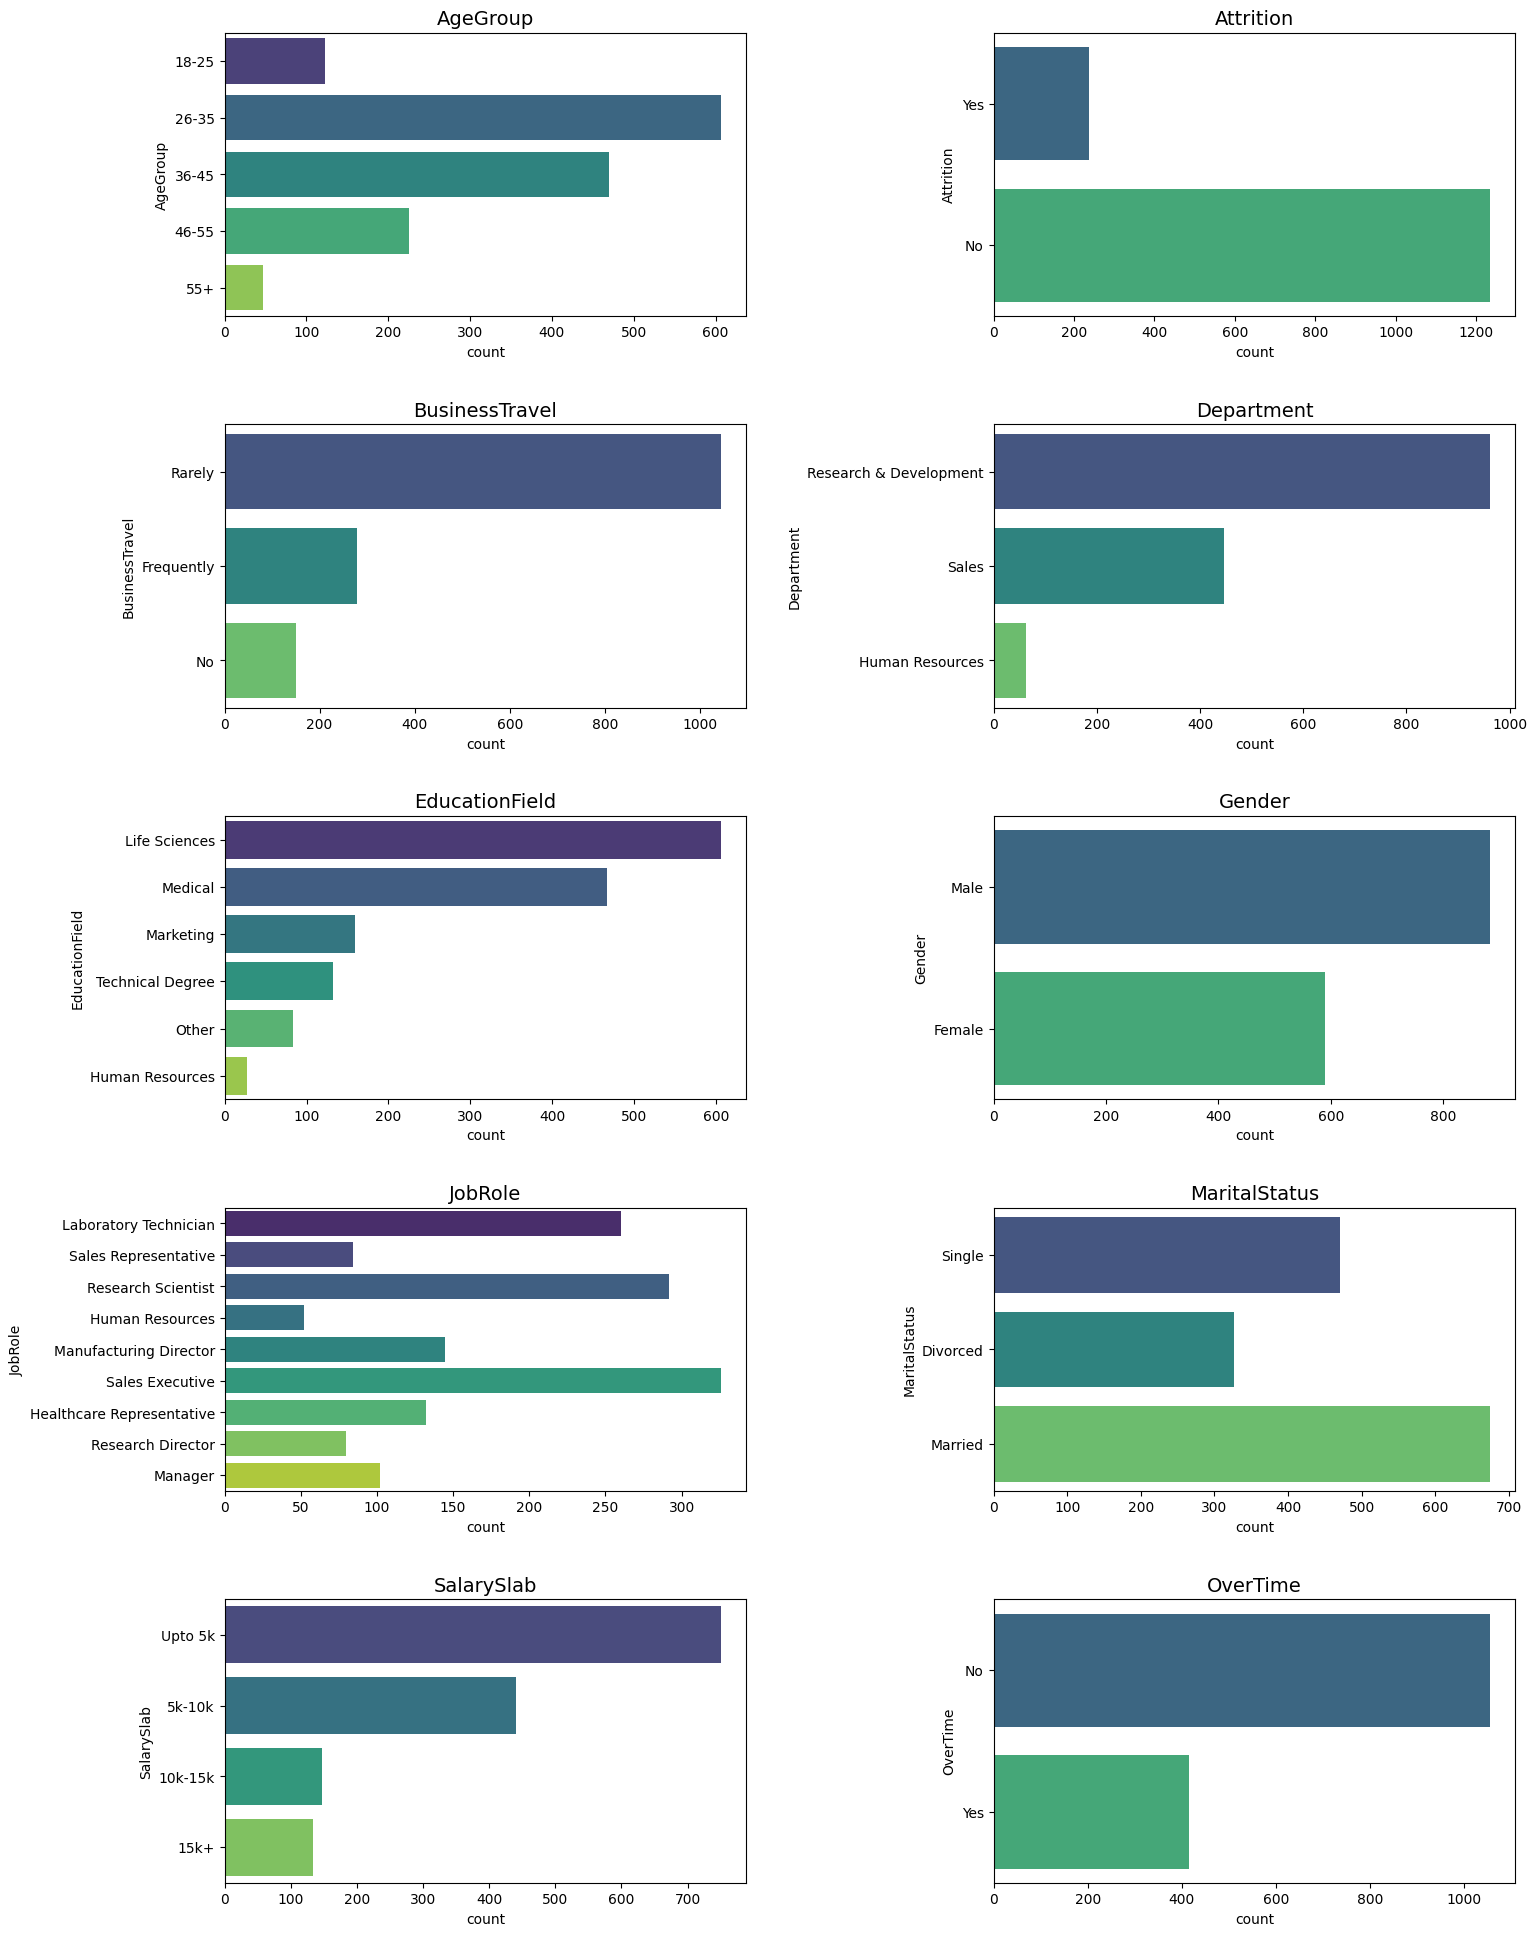

In [129]:
r = 5  
c = 2  
it = 1  

plt.figure(figsize=(16, 20))  
for i in object_cols[:10]: 
    plt.subplot(r, c, it)
    sns.countplot(y=datahr[i], palette="viridis")  
    plt.title(i, fontsize=14) 
    it += 1

plt.tight_layout(pad=3.0)  # Adjust padding for readability
plt.show()

## Numerical categories

In [130]:
numerical_col=datahr.select_dtypes(include=np.number)
numerical_col.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left_company
EmpID,,,,,,,,,,,,,,,,,,,,,
RM297,18,230,3,3,3,54,3,1,3,1420,...,3,0,0,2,3,0,0,0,0.0,1
RM302,18,812,10,3,4,69,2,1,3,1200,...,1,0,0,2,3,0,0,0,0.0,0
RM458,18,1306,5,3,2,69,3,1,2,1878,...,4,0,0,3,3,0,0,0,0.0,1


In [131]:
len(numerical_col.columns)

24

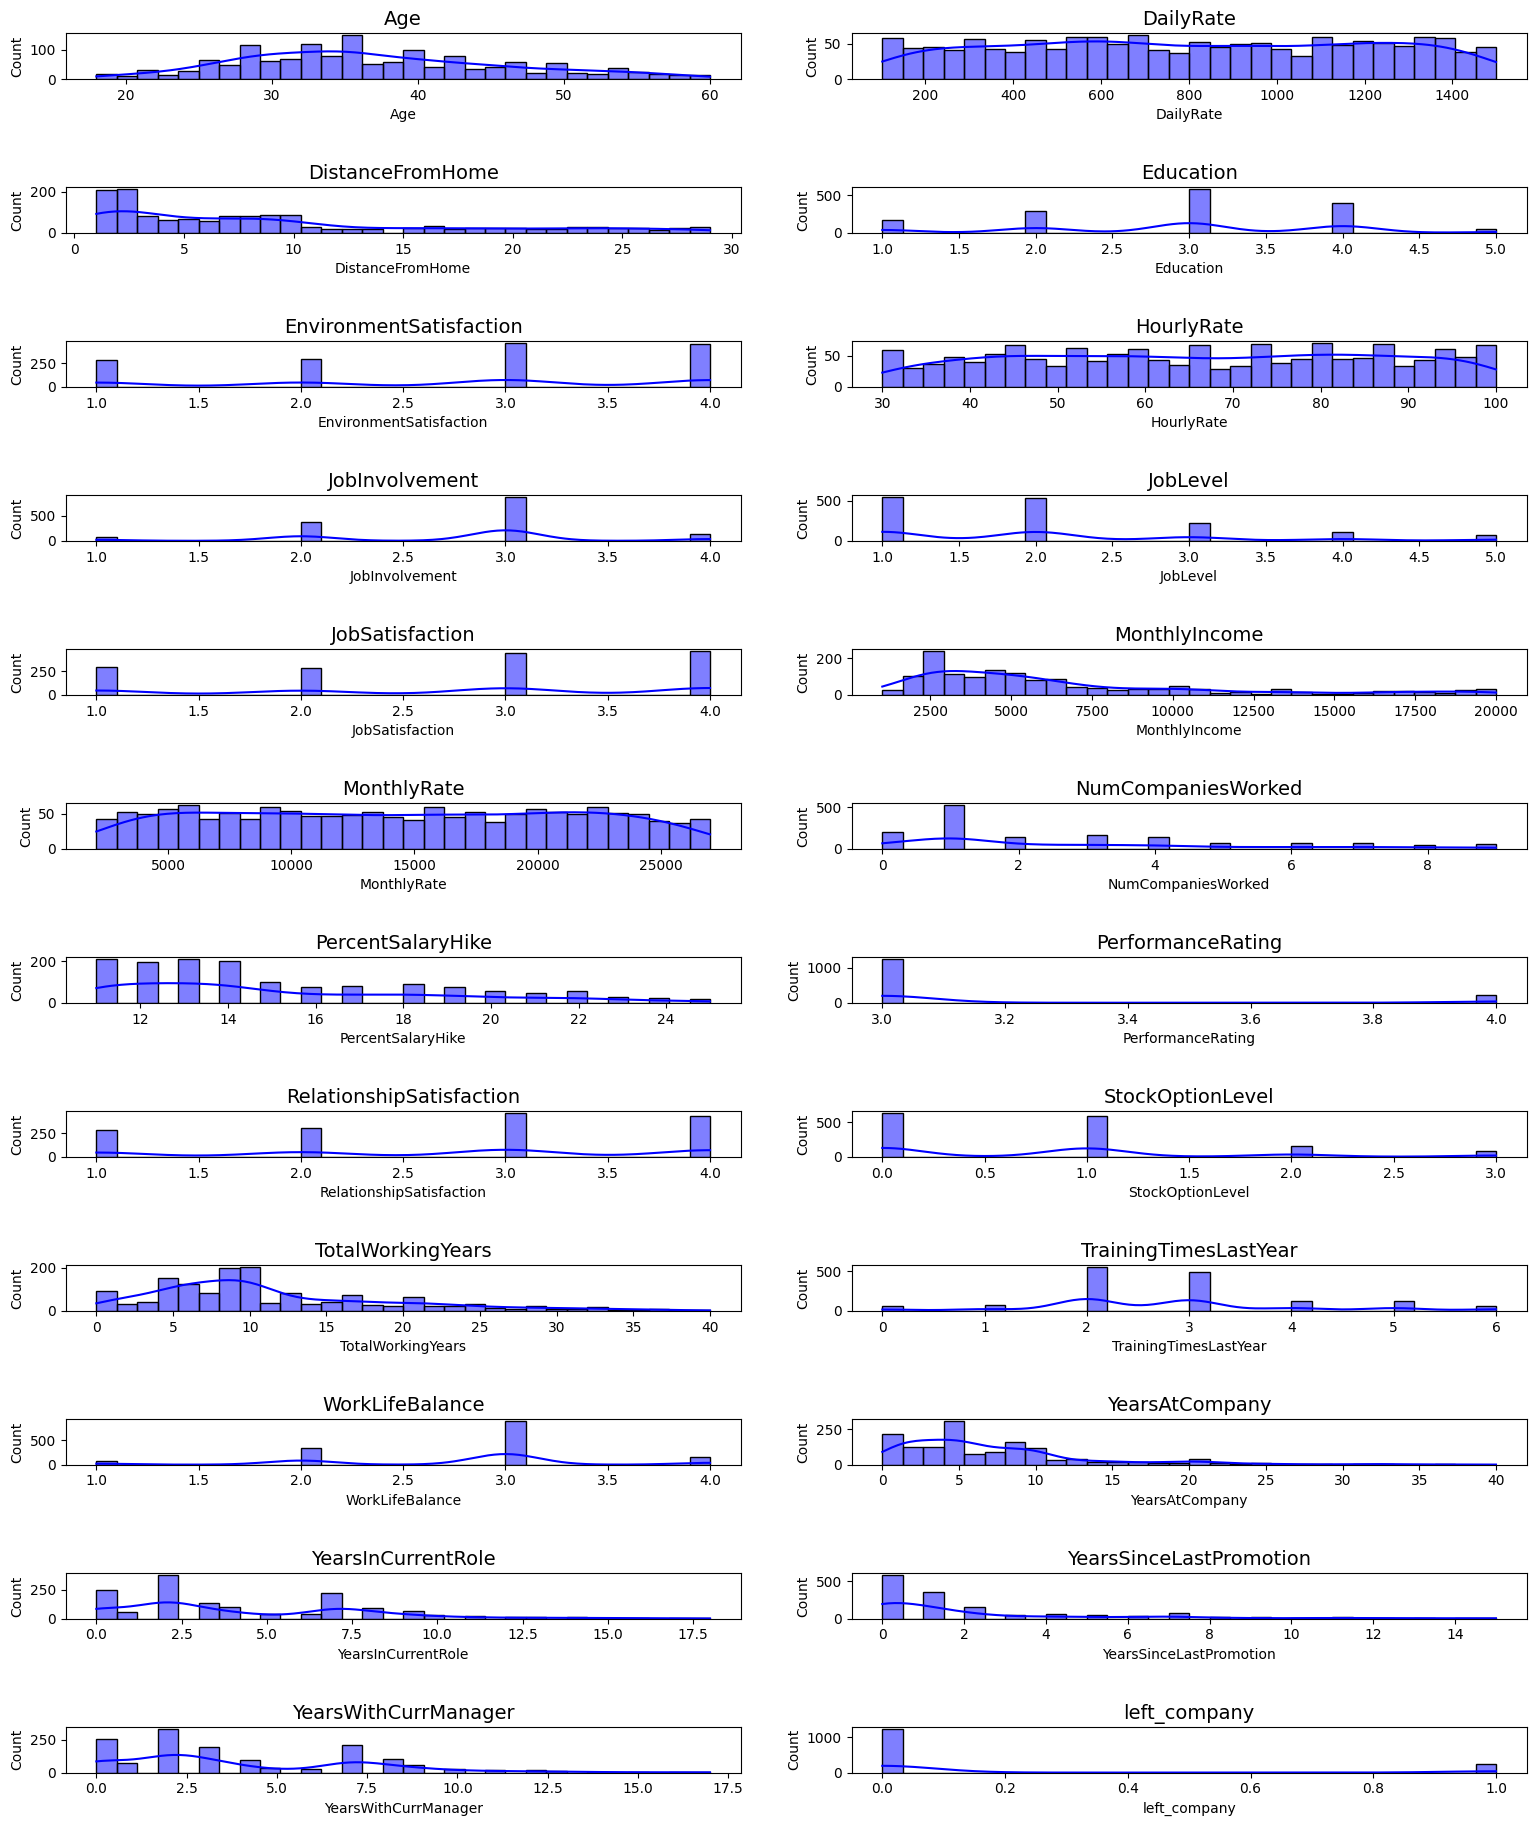

In [132]:
r = 13  
c = 2  
it = 1  

plt.figure(figsize=(16, 20))  
for i in numerical_col[:10]:  
    if it > r * c:  
        break
    plt.subplot(r, c, it)  
    sns.histplot(datahr[i], kde=True, bins=30, color="blue")  
    plt.title(i, fontsize=14)  
    it += 1

plt.tight_layout(pad=3.0)  
plt.show()




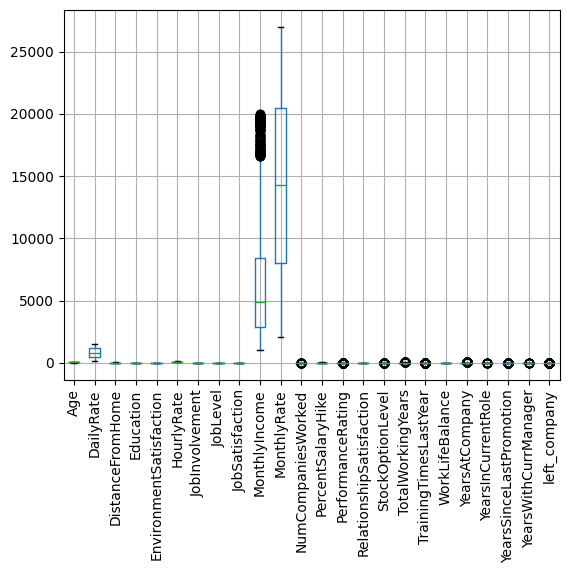

In [133]:
numerical_col.boxplot()
plt.xticks(rotation=90)
plt.show()

### Getting all data ready

In [277]:
datahrmod=pd.concat([numerical_col,object_cols],axis=1)
datahrmod.head(2)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,AgeGroup,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,SalarySlab,OverTime
EmpID,,,,,,,,,,,,,,,,,,,,,
RM297,18,230,3,3,3,54,3,1,3,1420,...,18-25,Yes,Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Upto 5k,No
RM302,18,812,10,3,4,69,2,1,3,1200,...,18-25,No,Rarely,Sales,Medical,Female,Sales Representative,Single,Upto 5k,No


In [278]:
datahrmod.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'left_company',
       'AgeGroup', 'Attrition', 'BusinessTravel', 'Department',
       'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'SalarySlab',
       'OverTime'],
      dtype='object')

In [279]:
datahrmod.drop("Attrition",axis=1,inplace=True)

In [280]:
def overtime (i):
    if i=="Yes":
        return 1
    else:
        return 0

In [281]:
datahrmod["Overtime_bin"]=datahrmod["OverTime"].apply(overtime)


In [282]:
datahrmod=datahrmod.drop("OverTime",axis=1)

In [236]:
datahrmod=datahrmod.drop("Age",axis=1)

In [283]:
datahrmod["SalarySlab"].unique()

array(['Upto 5k', '5k-10k', '10k-15k', '15k+'], dtype=object)

In [284]:
datahrmod['Salary'] = datahrmod['SalarySlab'].map({'Upto 5k':0,'5k-10k':1,'10k-15k':2,'15k+':3})
datahrmod["AgeGrouped"]= datahrmod["AgeGroup"].map({'18-25':0,"26-35":1, '36-45':2, '46-55':3, '55+':4})

In [288]:
datahrmod.drop(['SalarySlab',"AgeGroup"],axis=1)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,left_company,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Overtime_bin,Salary,AgeGrouped
EmpID,,,,,,,,,,,,,,,,,,,,,
RM297,18,230,3,3,3,54,3,1,3,1420,...,1,Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,0,0,0
RM302,18,812,10,3,4,69,2,1,3,1200,...,0,Rarely,Sales,Medical,Female,Sales Representative,Single,0,0,0
RM458,18,1306,5,3,2,69,3,1,2,1878,...,1,Frequently,Sales,Marketing,Male,Sales Representative,Single,1,0,0
RM728,18,287,5,2,2,73,3,1,4,1051,...,0,No,Research & Development,Life Sciences,Male,Research Scientist,Single,0,0,0
RM829,18,247,8,1,3,80,3,1,3,1904,...,1,No,Research & Development,Medical,Male,Laboratory Technician,Single,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RM412,60,422,7,3,1,41,3,5,1,19566,...,0,Rarely,Research & Development,Life Sciences,Female,Manager,Married,0,3,4
RM428,60,1499,28,3,3,80,2,3,1,10266,...,0,Frequently,Sales,Marketing,Female,Sales Executive,Married,0,2,4
RM537,60,1179,16,4,1,84,3,2,1,5405,...,0,Rarely,Sales,Marketing,Male,Sales Executive,Single,0,1,4


In [289]:
datahrmod.select_dtypes(include="object").nunique()

AgeGroup          5
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
SalarySlab        4
dtype: int64

In [290]:
datahrmod2= pd.get_dummies(datahrmod,columns=['BusinessTravel','Department',"EducationField",'Gender',"JobRole",'MaritalStatus'],drop_first=True)
datahrmod2.head()

datahrmod2.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'left_company',
       'AgeGroup', 'SalarySlab', 'Overtime_bin', 'Salary', 'AgeGrouped',
       'BusinessTravel_No', 'BusinessTravel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Direc

In [291]:
for i in ['BusinessTravel_No',
       'BusinessTravel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Married',
       'MaritalStatus_Single']:
    
    datahrmod2[i]=datahrmod2[i].replace({True:1,False:0})

In [292]:
datahrmod2.head(4)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
EmpID,,,,,,,,,,,,,,,,,,,,,
RM297,18,230,3,3,3,54,3,1,3,1420,...,0,1,0,0,0,0,0,0,0,1
RM302,18,812,10,3,4,69,2,1,3,1200,...,0,0,0,0,0,0,0,1,0,1
RM458,18,1306,5,3,2,69,3,1,2,1878,...,0,0,0,0,0,0,0,1,0,1
RM728,18,287,5,2,2,73,3,1,4,1051,...,0,0,0,0,0,1,0,0,0,1


In [293]:
datahrmod2.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'left_company',
       'AgeGroup', 'SalarySlab', 'Overtime_bin', 'Salary', 'AgeGrouped',
       'BusinessTravel_No', 'BusinessTravel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Direc

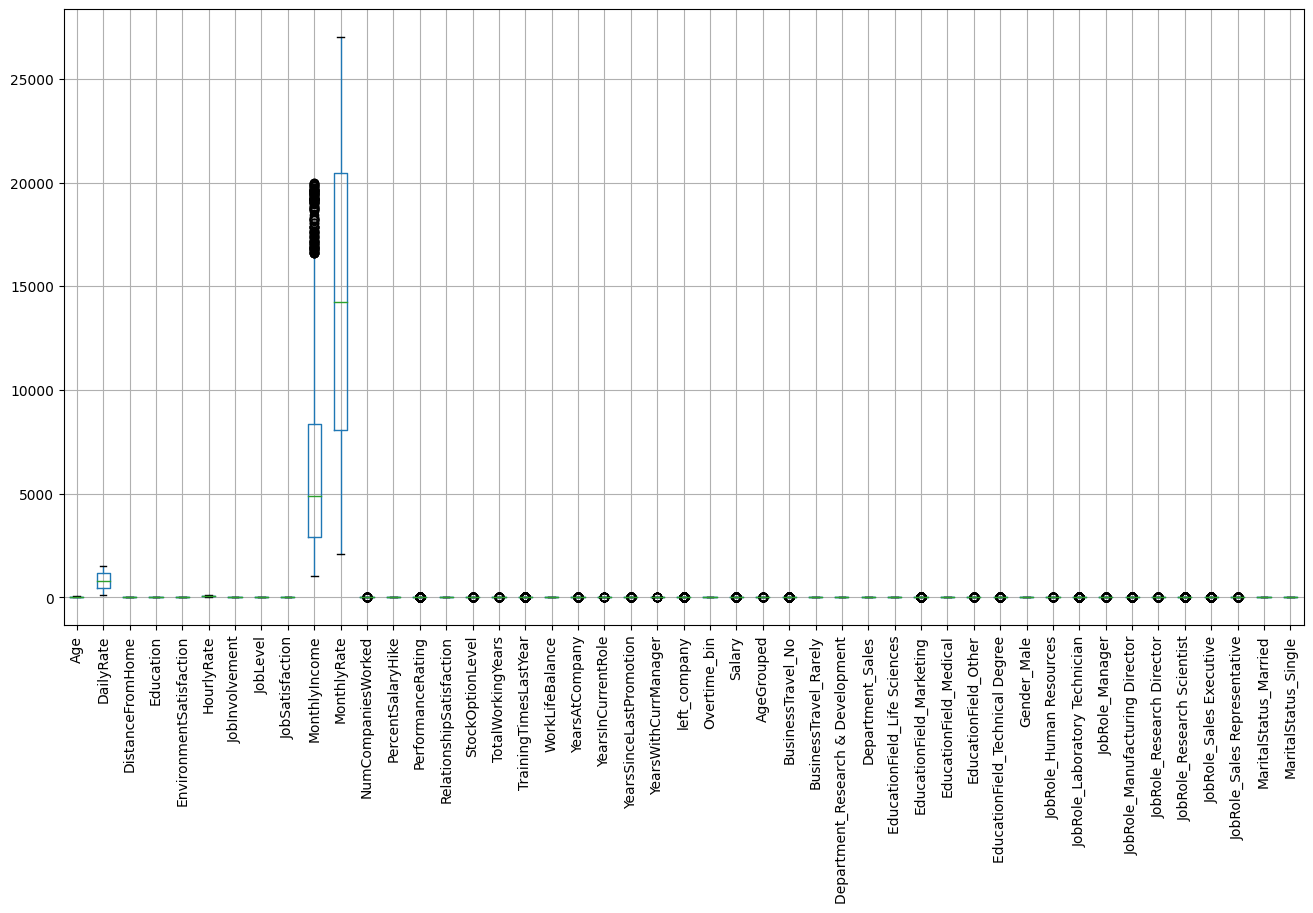

In [294]:
plt.figure(figsize=(16, 8))  
datahrmod2.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
datahrmod2.to_csv("datahrformodel.csv")

In [332]:
correlations = datahrmod2.corr()
correlation_with_left_company = correlations["left_company"]
# Filter the correlations where the absolute value is greater than 0.11
filtered_correlations = correlation_with_left_company
sorted_correlations=filtered_correlations.sort_values(ascending=False)
print(sorted_correlations)

left_company                         1.000000
Overtime_bin                         0.246532
MaritalStatus_Single                 0.175175
JobRole_Sales Representative         0.155247
JobRole_Laboratory Technician        0.097734
Department_Sales                     0.080694
DistanceFromHome                     0.077585
EducationField_Technical Degree      0.069614
EducationField_Marketing             0.056074
NumCompaniesWorked                   0.043469
JobRole_Human Resources              0.036378
Gender_Male                          0.029298
JobRole_Sales Executive              0.020241
MonthlyRate                          0.014647
PerformanceRating                    0.003268
JobRole_Research Scientist           0.000085
HourlyRate                          -0.005593
PercentSalaryHike                   -0.013827
EducationField_Other                -0.018865
Education                           -0.030526
EducationField_Life Sciences        -0.031926
YearsSinceLastPromotion           

<p>Positive correlations show:

-Overtime seems to be the variable that is key to make people leave the job. This implies that overtime leads to disatisfaction.
-Single employees are more likely to leave compared to married or divorced employees, this might be related to the fact that not having family responsibilities allows them to take more risks.
-Sales representatives have a higher tendency to leave the company. This may be the result of a more stressful role since its related to the pressure of getting sales.

Negative correlations also provide great insight:

-Employees with more years of total experience are less likely to leave, this might be due to the fact that they value job stability.
-Similarly, employees with a better job (higher job level) leave the company less, which implies that those who have better conditions stay at the company.
-Years in current role and years with the current manager suggest that employees who have spent more time in their current job or have been under the same manager for longer stay in the company.
-A higher salary (or monthly income) makes employees leave less.
-Age (and Age group) seems to be another factor to consider, younger workers are more lenient to leave the company (this leads to think that they might be seeking career growth)</p>



In [334]:
import statsmodels.api as sm

In [333]:
y1 = datahrmod2['left_company']
x1 = datahrmod2.drop('left_company',axis=1)

In [335]:
xc=sm.add_constant(x1)
model=sm.Logit(y1,xc).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). The types seen wereNone and const                                float64
Age                                    int64
DailyRate                              int64
DistanceFromHome                       int64
Education                              int64
EnvironmentSatisfaction                int64
HourlyRate                             int64
JobInvolvement                         int64
JobLevel                               int64
JobSatisfaction                        int64
MonthlyIncome                          int64
MonthlyRate                            int64
NumCompaniesWorked                     int64
PercentSalaryHike                      int64
PerformanceRating                      int64
RelationshipSatisfaction               int64
StockOptionLevel                       int64
TotalWorkingYears                      int64
TrainingTimesLastYear                  int64
WorkLifeBalance                        int64
YearsAtCompany                         int64
YearsInCurrentRole                     int64
YearsSinceLastPromotion                int64
YearsWithCurrManager                 float64
AgeGroup                              object
SalarySlab                            object
Overtime_bin                           int64
Salary                                 int64
AgeGrouped                             int64
BusinessTravel_No                      uint8
BusinessTravel_Rarely                  uint8
Department_Research & Development      uint8
Department_Sales                       uint8
EducationField_Life Sciences           uint8
EducationField_Marketing               uint8
EducationField_Medical                 uint8
EducationField_Other                   uint8
EducationField_Technical Degree        uint8
Gender_Male                            uint8
JobRole_Human Resources                uint8
JobRole_Laboratory Technician          uint8
JobRole_Manager                        uint8
JobRole_Manufacturing Director         uint8
JobRole_Research Director              uint8
JobRole_Research Scientist             uint8
JobRole_Sales Executive                uint8
JobRole_Sales Representative           uint8
MaritalStatus_Married                  uint8
MaritalStatus_Single                   uint8
dtype: object. The data was
EmpID
RM297     1
RM302     0
RM458     1
RM728     0
RM829     1
         ..
RM412     0
RM428     0
RM537     0
RM880     0
RM1210    0
Name: left_company, Length: 1473, dtype: int64
and
         const  Age  DailyRate  DistanceFromHome  Education  \
EmpID                                                        
RM297     1.0   18        230                 3          3   
RM302     1.0   18        812                10          3   
RM458     1.0   18       1306                 5          3   
RM728     1.0   18        287                 5          2   
RM829     1.0   18        247                 8          1   
...       ...  ...        ...               ...        ...   
RM412     1.0   60        422                 7          3   
RM428     1.0   60       1499                28          3   
RM537     1.0   60       1179                16          4   
RM880     1.0   60        696                 7          4   
RM1210    1.0   60        370                 1          4   

        EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
EmpID                                                                   
RM297                         3          54               3         1   
RM302                         4          69               2         1   
RM458                         2          69               3         1   
RM728                         2          73               3         1   
RM829                         3          80               3         1   
...                         ...         ...             ...       ...   
RM412                         1          41               3         5   
RM428                         3          80               2         3   
RM537                         1          84               3         2   
RM880                         2          52               4         2   
RM1210                        3          92               1         3   

        JobSatisfaction  ...  JobRole_Human Resources  \
EmpID                    ...                            
RM297                 3  ...                        0   
RM302                 3  ...                        0   
RM458                 2  ...                        0   
RM728                 4  ...                        0   
RM829                 3  ...                        0   
...                 ...  ...                      ...   
RM412                 1  ...                        0   
RM428                 1  ...                        0   
RM537                 1  ...                        0   
RM880                 4  ...                        0   
RM1210                4  ...                        0   

        JobRole_Laboratory Technician  JobRole_Manager  \
EmpID                                                    
RM297                               1                0   
RM302                               0                0   
RM458                               0                0   
RM728                               0                0   
RM829                               1                0   
...                               ...              ...   
RM412                               0                1   
RM428                               0                0   
RM537                               0                0   
RM880                               0                0   
RM1210                              0                0   

        JobRole_Manufacturing Director  JobRole_Research Director  \
EmpID                                                               
RM297                                0                          0   
RM302                                0                          0   
RM458                                0                          0   
RM728                                0                          0   
RM829                                0                          0   
...                                ...                        ...   
RM412                                0                          0   
RM428                                0                          0   
RM537                                0                          0   
RM880                                0                          0   
RM1210                               0                          0   

        JobRole_Research Scientist  JobRole_Sales Executive  \
EmpID                                                         
RM297                            0                        0   
RM302                            0                        0   
RM458                            0                        0   
RM728                            1                        0   
RM829                            0                        0   
...                            ...                      ...   
RM412                            0                        0   
RM428                            0                        1   
RM537                            0                        1   
RM880                            0                        1   
RM1210                           0                        0   

        JobRole_Sales Representative  MaritalStatus_Married  \
EmpID                                                         
RM297                              0                      0   
RM302                              1                      0   
RM458                              1                      0   
RM728                              0                      0   
RM829                              0                      0   
...                              ...                    ...   
RM412                              0                      1   
RM428                              0                      1   
RM537                              0                      0   
RM880                              0                      0   
RM1210                             0                      0   

        MaritalStatus_Single  
EmpID                         
RM297                      1  
RM302                      1  
RM458                      1  
RM728                      1  
RM829                      1  
...                      ...  
RM412                      0  
RM428                      0  
RM537                      1  
RM880                      0  
RM1210                     0  

[1473 rows x 49 columns]
before. After,
[1 0 1 ... 0 0 0]
[[1.0 18 230 ... 0 0 1]
 [1.0 18 812 ... 1 0 1]
 [1.0 18 1306 ... 1 0 1]
 ...
 [1.0 60 1179 ... 0 0 1]
 [1.0 60 696 ... 0 0 0]
 [1.0 60 370 ... 0 0 0]].

## Let's check the attrition %

<p> Aside from the analysis shown above, we'll show a comparison between the Attrition and each variable in order to find what makes employees leave the company:</p>

In [298]:
datahr["Attrition"].value_counts()

No     1236
Yes     237
Name: Attrition, dtype: int64

In [299]:
datahr["Attrition"].value_counts(normalize=True)

#16.0896 employees left, let's see why.

No     0.839104
Yes    0.160896
Name: Attrition, dtype: float64

## Age vs Attrition 

In [300]:
#let's find out if Age (AgeGroup actually) is a significant contribution to the attrition

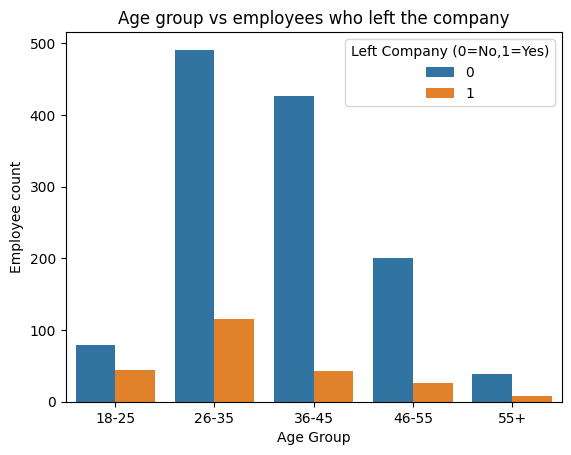

In [330]:
sns.countplot(x="AgeGroup", hue="left_company", data=datahr)
plt.title ("Age group vs employees who left the company")
plt.xlabel("Age Group")
plt.ylabel("Employee count")
plt.legend(title="Left Company (0=No,1=Yes)")
plt.show()

In [302]:
datahr_perage = datahr.groupby("AgeGroup")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
datahr_perage

,AgeGroup,left_company,percentage
0,18-25,0,64.227642
1,18-25,1,35.772358
2,26-35,0,80.889621
3,26-35,1,19.110379
4,36-45,0,90.851064
5,36-45,1,9.148936
6,46-55,0,88.495575
7,46-55,1,11.504425
8,55+,0,82.978723
9,55+,1,17.021277


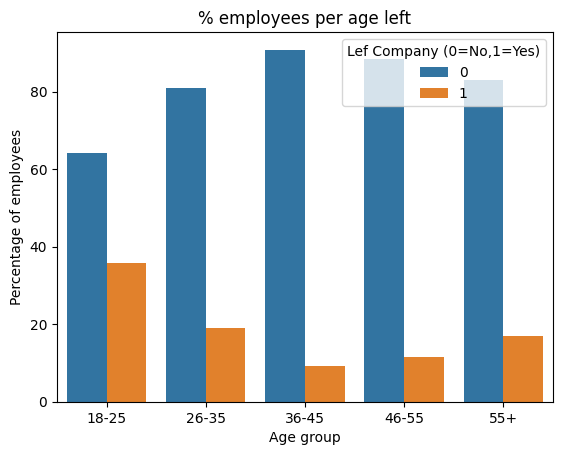

In [303]:
sns.barplot(x="AgeGroup",y="percentage", hue="left_company",data=datahr_perage)
plt.title("% employees per age left")
plt.xlabel("Age group")
plt.ylabel("Percentage of employees")
plt.legend(title="Lef Company (0=No,1=Yes)")
plt.show()



<p>Data shows that employees in age range 18-25 are more likely to leave 35.77, followed by 26-35 (19%) and +55 (17%). But why?</p>

## Business travel vs Attrition 

In [304]:
datahr_pertravel=datahr.groupby("BusinessTravel")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
datahr_pertravel

,BusinessTravel,left_company,percentage
0,Frequently,0,75.179856
1,Frequently,1,24.820144
2,No,0,92.000000
3,No,1,8.000000
4,Rarely,0,85.071770
5,Rarely,1,14.928230


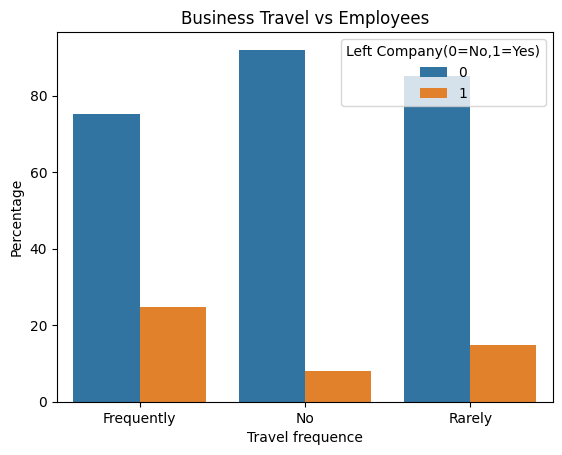

In [305]:
sns.barplot(x="BusinessTravel",y="percentage",hue="left_company",data=datahr_pertravel)
plt.title("Business Travel vs Employees")
plt.xlabel("Travel frequence")
plt.ylabel("Percentage")
plt.legend(title="Left Company(0=No,1=Yes)")
plt.show()

<p> Results show that the more frequent the employees travel for business the more likely they are to leave the company. Do younger employees travel more? Let's find out </p>

In [306]:
hrtravelperage=datahr.groupby("AgeGroup")["BusinessTravel"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
hrtravelperage

,AgeGroup,BusinessTravel,percentage
0,18-25,Rarely,75.609756
1,18-25,Frequently,13.821138
2,18-25,No,10.569106
3,26-35,Rarely,69.357496
4,26-35,Frequently,21.087315
5,26-35,No,9.555189
6,36-45,Rarely,68.723404
7,36-45,Frequently,18.936170
8,36-45,No,12.340426
9,46-55,Rarely,75.663717


In [307]:
hrtravelperagefrequent=hrtravelperage[hrtravelperage["BusinessTravel"]=="Frequently"].sort_values(by="percentage",ascending=False)
hrtravelperagefrequent

,AgeGroup,BusinessTravel,percentage
4,26-35,Frequently,21.087315
7,36-45,Frequently,18.936170
10,46-55,Frequently,16.814159
1,18-25,Frequently,13.821138
13,55+,Frequently,12.765957


<p>Data shows that Age Group 18-25 is far from being the group that travels the most, having one of the lowest percentages in frequent business travel.</p>

### DailyRate vs Attrition

In [308]:
datahr["DailyRate"].describe()

count    1473.000000
mean      802.659878
std       403.245460
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

In [309]:
#because the daily rate has too many different values and they all have a range between 102 and 1499, we decided to create a new column grouping daily rates in 4:
def rategrouping(i):
    if i <400:
        return "100-399"
    elif i>=400 and i<=800:
        return "400-799"
    elif i>=800 and i<=1200:
        return "800-1199"
    else:
        return "+1200"

In [310]:
datahr["Dayrate group"]=datahr["DailyRate"].apply(rategrouping)

In [311]:
datahr["Dayrate group"].unique()

array(['100-399', '800-1199', '+1200', '400-799'], dtype=object)

In [312]:
hrdayrate=datahr.groupby("Dayrate group")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
hrdayrate




,Dayrate group,left_company,percentage
0,+1200,0,86.645963
1,+1200,1,13.354037
2,100-399,0,80.333333
3,100-399,1,19.666667
4,400-799,0,82.949309
5,400-799,1,17.050691
6,800-1199,0,85.371703
7,800-1199,1,14.628297


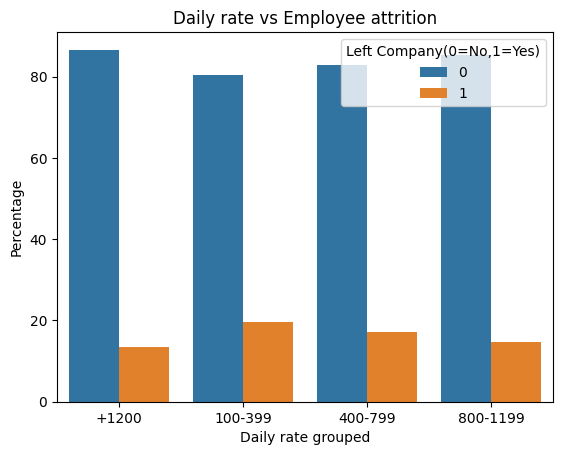

In [313]:
sns.barplot(x="Dayrate group", y="percentage", hue="left_company",data=hrdayrate)
plt.title("Daily rate vs Employee attrition")
plt.xlabel("Daily rate grouped")
plt.ylabel("Percentage")
plt.legend(title="Left Company(0=No,1=Yes)")
plt.show()

###  Department vs Attrition

In [314]:
departmenthr=datahr.groupby("Department")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
departmenthr

,Department,left_company,percentage
0,Human Resources,0,80.952381
1,Human Resources,1,19.047619
2,Research & Development,0,86.188993
3,Research & Development,1,13.811007
4,Sales,0,79.418345
5,Sales,1,20.581655


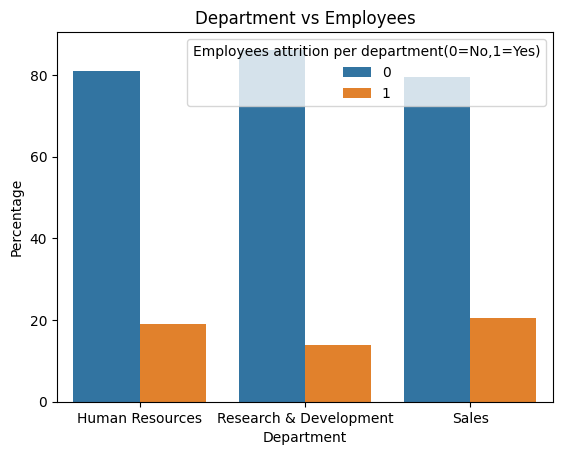

In [315]:
sns.barplot(x="Department",y="percentage",hue="left_company",data=departmenthr)
plt.title("Department vs Employees")
plt.xlabel("Department")
plt.ylabel("Percentage")
plt.legend(title="Employees attrition per department(0=No,1=Yes)")
plt.show()

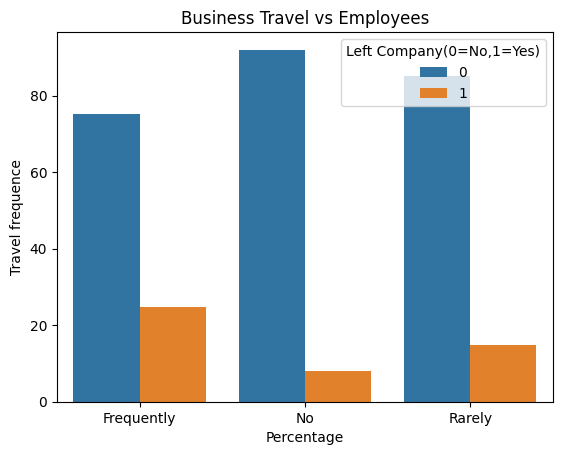

In [316]:
sns.barplot(x="BusinessTravel",y="percentage",hue="left_company",data=datahr_pertravel)
plt.title("Business Travel vs Employees")
plt.xlabel("Percentage")
plt.ylabel("Travel frequence")
plt.legend(title="Left Company(0=No,1=Yes)")
plt.show()

### Distance vs Attrition

In [317]:
def distancegroup(i):
    if i<11:
        return "1-10"
    elif i>=11 and i<21:
        return "11-20"
    else:
        return "21+"

In [318]:
datahr["distance grouped"]=datahr['DistanceFromHome'].apply(distancegroup)

In [319]:
disthr=datahr.groupby('distance grouped')["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
disthr

,distance grouped,left_company,percentage
0,1-10,0,85.992218
1,1-10,1,14.007782
2,11-20,0,80.000000
3,11-20,1,20.000000
4,21+,0,78.048780
5,21+,1,21.951220


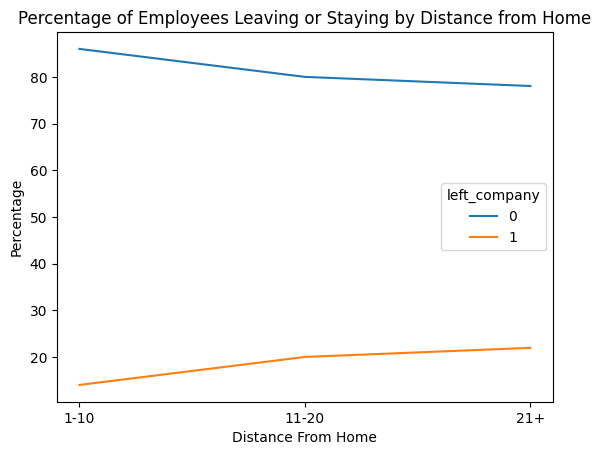

In [320]:
sns.lineplot(x="distance grouped", y="percentage", hue="left_company", data=disthr)

plt.title("Percentage of Employees Leaving or Staying by Distance from Home")
plt.xlabel("Distance From Home")
plt.ylabel("Percentage")
plt.show()


<p>The data suggests that when the distance from home exceeds 10, the likelihood of leaving the company increases from 14% to 20%. However, the percentage shows little variation beyond 20, rising only slightly to 21.9%, compared to the larger increase in the 10–20 range.</p>

### Eductation level vs Attrition

In [321]:
correlation_edu=datahr["Education"].corr(datahr["left_company"])
correlation_edu

-0.03052613750095787

<p>The results show that Education level has a weak impact</p>

### (Other) Numerical variables

In [ ]:
## These variables are numerical so we will check their correlation with attrition. We included Age and distance from home, despite having performed an individual analysis so to get a deeper understanding of the data:
numerical_variables= ["Age",'DistanceFromHome',"EnvironmentSatisfaction",'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
        'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',"left_company"]
correlation_matrix=datahr[numerical_variables].corr()
print(correlation_matrix["left_company"].sort_values(ascending=False))



left_company                1.000000
DistanceFromHome            0.077585
NumCompaniesWorked          0.043469
MonthlyRate                 0.014647
PerformanceRating           0.003268
HourlyRate                 -0.005593
PercentSalaryHike          -0.013827
YearsSinceLastPromotion    -0.032487
RelationshipSatisfaction   -0.045763
TrainingTimesLastYear      -0.059769
WorkLifeBalance            -0.064221
JobSatisfaction            -0.103276
EnvironmentSatisfaction    -0.104022
JobInvolvement             -0.129678
YearsAtCompany             -0.134106
StockOptionLevel           -0.136939
YearsWithCurrManager       -0.157813
Age                        -0.158775
MonthlyIncome              -0.159458
YearsInCurrentRole         -0.160302
JobLevel                   -0.168926
TotalWorkingYears          -0.170847
Name: left_company, dtype: float64


<p>The correlation analysis shows that none of these variables have a strong impact on employees' decisions to leave the company. Although not significant, the data suggests that, among the variables we calculated correlations for, 'Distance from Home' and 'Number of Companies Worked' are the most relevant factors influencing employees to leave. However, the correlations are weak, indicating that while these variables may make employees more likely to leave, their overall impact is low.

Distance from Home: 0.077585
Number of Companies Worked: 0.043469
Additionally, variables with negative correlations, such as age and monthly income, indicate that employees who are older or earn higher salaries are less likely to leave the company, which is consistent with expectations.</p>

### EnvironmentSatisfaction vs Attrition


In [ ]:
Environmenthr=datahr.groupby("EnvironmentSatisfaction")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()


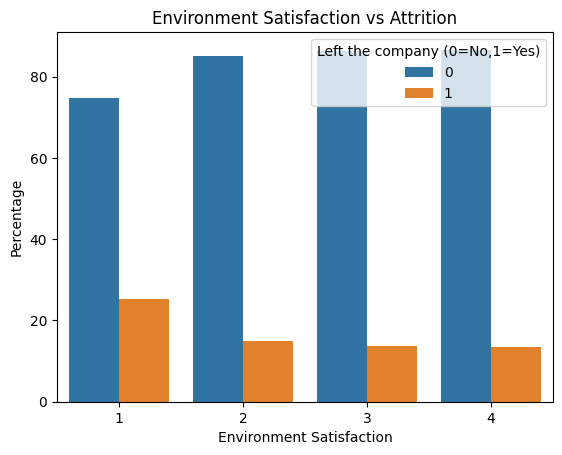

In [ ]:
sns.barplot(x="EnvironmentSatisfaction", y="percentage", hue="left_company", data=Environmenthr)
plt.title("Environment Satisfaction vs Attrition")
plt.xlabel("Environment Satisfaction")
plt.ylabel("Percentage")
plt.legend(title="Left the company (0=No,1=Yes)")
plt.show()



In [ ]:
Environmenthr

,EnvironmentSatisfaction,left_company,percentage
0,1,0,74.647887
1,1,1,25.352113
2,2,0,85.017422
3,2,1,14.982578
4,3,0,86.343612
5,3,1,13.656388
6,4,0,86.607143
7,4,1,13.392857


<p>The graphic shows that employees with a lower satisfaction are significantly more prone to leave, however, the likeness to leave the company shows no remarkable differences for other levels of environment satisfaction. We already tested this through the correlation calculation, which had a value of -0.10, meaning that higher the satisfaction the lower the attribution rate  </p>

### MaritalStatus vs Attrition


In [ ]:
married=datahr.groupby("MaritalStatus")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
married

,MaritalStatus,left_company,percentage
0,Divorced,0,89.908257
1,Divorced,1,10.091743
2,Married,0,87.555556
3,Married,1,12.444444
4,Single,0,74.522293
5,Single,1,25.477707


In [ ]:
married2=datahr.groupby("AgeGroup")["MaritalStatus"].value_counts().rename("percentage").reset_index()
married2

,AgeGroup,MaritalStatus,percentage
0,18-25,Single,63
1,18-25,Married,45
2,18-25,Divorced,15
3,26-35,Married,268
4,26-35,Single,203
5,26-35,Divorced,136
6,36-45,Married,222
7,36-45,Single,133
8,36-45,Divorced,115
9,46-55,Married,117


<p>The data shows that single employees have a higher likelihood of leaving (25.48%) compared to married (12.44%) and divorced employees (10.09%). However, when we examine age groups, we see that single individuals are more concentrated in the younger age groups (18–25 and 26–35), where we also observe the highest percentages in these age groups (51.22% and 33.44%, respectively). Since younger age groups typically have higher turnover rates, the higher attrition among single employees could be more a reflection of their age distribution than of their marital status itself.</p>

### EducationField vs Attrition

In [ ]:
edufielddata=datahr.groupby("EducationField")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
edufielddata

,EducationField,left_company,percentage
0,Human Resources,0,74.074074
1,Human Resources,1,25.925926
2,Life Sciences,0,85.313531
3,Life Sciences,1,14.686469
4,Marketing,0,77.987421
5,Marketing,1,22.012579
6,Medical,0,86.480687
7,Medical,1,13.519313
8,Other,0,86.746988
9,Other,1,13.253012


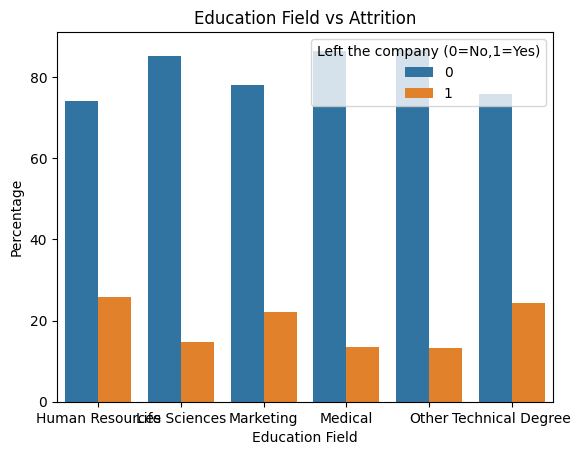

In [ ]:
sns.barplot(x="EducationField", y="percentage", hue="left_company", data=edufielddata)
plt.title("Education Field vs Attrition")
plt.xlabel("Education Field")
plt.ylabel("Percentage")
plt.legend(title="Left the company (0=No,1=Yes)")
plt.show()

<p>The data shows that employees who have studied a degree in Human Resources, Marketing or a Technical degree are more likely to leave the company</p>

 ### Gender vs Attrition

In [ ]:
genderdata=datahr.groupby("Gender")["left_company"].value_counts(normalize=True).mul(100).rename("percentage").reset_index()
genderdata

,Gender,left_company,percentage
0,Female,0,85.229202
1,Female,1,14.770798
2,Male,0,83.031674
3,Male,1,16.968326


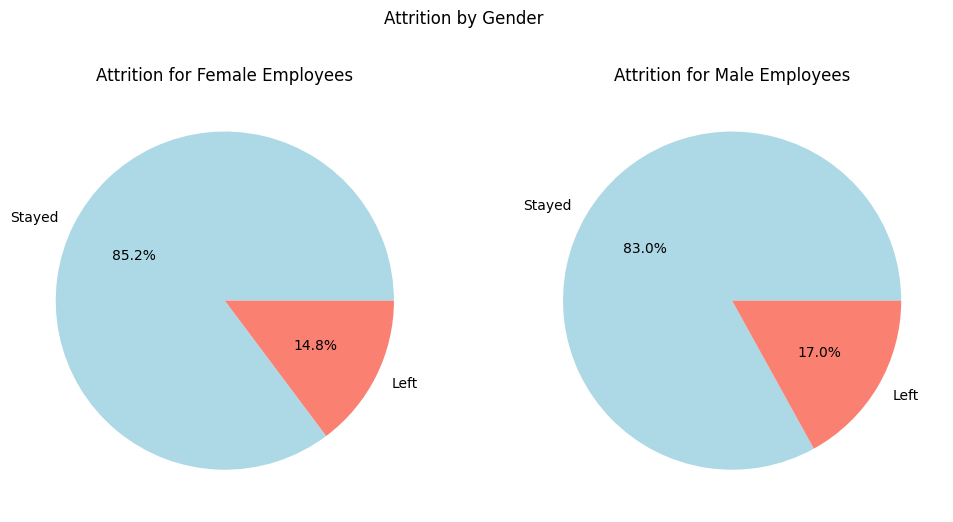

In [ ]:

# data for each gender
male_data = genderdata[genderdata["Gender"] == "Male"]
female_data = genderdata[genderdata["Gender"] == "Female"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Females
axes[0].pie(female_data["percentage"], labels=["Stayed", "Left"], autopct="%1.1f%%", colors=["lightblue", "salmon"])
axes[0].set_title("Attrition for Female Employees")

# Males
axes[1].pie(male_data["percentage"], labels=["Stayed", "Left"], autopct="%1.1f%%", colors=["lightblue", "salmon"])
axes[1].set_title("Attrition for Male Employees")

plt.suptitle("Attrition by Gender")
plt.show()

<p>Male employees have a higher rate of attrition (17%vs14.8), however, given the small difference, gender does not appear to be a significant factor in determining wether an employee leaves the company.</p>

In [ ]:
datahr.columns

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'left_company', 'Dayrate group', 'distance grouped'],
      dtype='object')

In [ ]:
list=['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

<p>Individual results show that employees that leave the company belong to these subgroups:

-Age group 18-25
-High travel frequence
-Lower daily rate
-Sales and & HHRR  (20.5&19.0%)
-Distance +10

Non relevant variables for attrition:
-Gender
-Marital status


</p>

# Going even further: transforming all object variables into binary